In [27]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [28]:
#获取数据
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
#查看当前各票售出的总数
print("各票售出的总数:\n",df.Ticket.value_counts())
aa = df[df.Ticket=='A/5 21171']
print("\n",aa.shape)

各票售出的总数:
 1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
349223      1
349233      1
237442      1
3101264     1
113800      1
Name: Ticket, Length: 681, dtype: int64

 (1, 12)


当前一共卖出了多少卖出了多少票号不同的车票: 681
当前排名前10的车票票数:
 Ticket
1601            7
CA. 2343        7
347082          7
CA 2144         6
347088          6
3101295         6
S.O.C. 14879    5
382652          5
PC 17757        4
4133            4
dtype: int64


Text(0.5, 0, '车票编码')

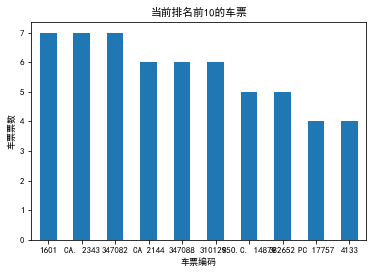

In [30]:
df1=df.groupby(["Ticket"]).size()
print("当前一共卖出了多少卖出了多少票号不同的车票:",df1.size)
df2=df1.sort_values(ascending=False)
print("当前排名前10的车票票数:\n",df2.head(10))

#柱状图绘制
plt.rcParams['font.size']=9
plt.rcParams['font.family']='SimHei'
df2.head(10).plot(kind='bar',rot=0)
plt.title('当前排名前10的车票')
plt.ylabel('车票票数')
plt.xlabel('车票编码')

<AxesSubplot:title={'center':'购买当天车票的男女比例'}, ylabel='Sex'>

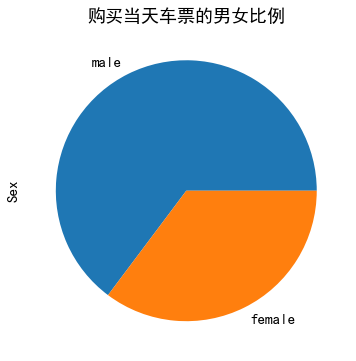

In [34]:
#饼状图
star=df.dropna(how='any',subset=['Sex'])
plt.figure(1,figsize=(8,6))
plt.rcParams['font.size']=15
sex = star['Sex'].value_counts()
plt.title('购买当天车票的男女比例')
sex.plot(kind='pie')


<AxesSubplot:xlabel='Sex', ylabel='count'>

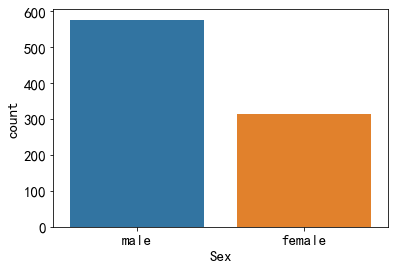

In [35]:
#可视化乘客的性别分布
sns.countplot(x="Sex",data=df)

C:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

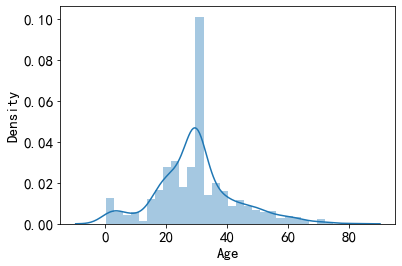

In [32]:
#用年龄的均值进行缺失值的填充
mean = df['Age'].mean()
#print(mean)
df['Age']=df['Age'].fillna(mean)
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

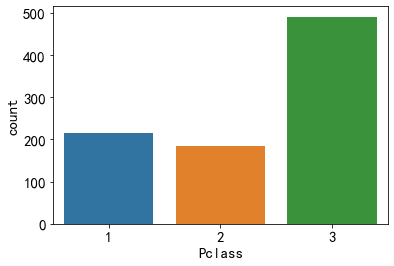

In [36]:
#对火车的等级进行计数
sns.countplot(x="Pclass",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

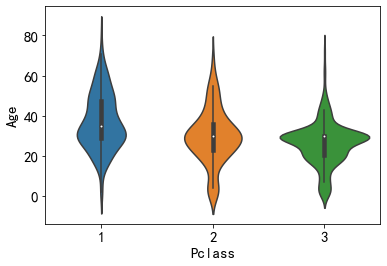

In [37]:
#结合火车车厢等级，绘制乘客年龄分布的小提琴图
sns.violinplot(y = 'Age',x = 'Pclass',data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

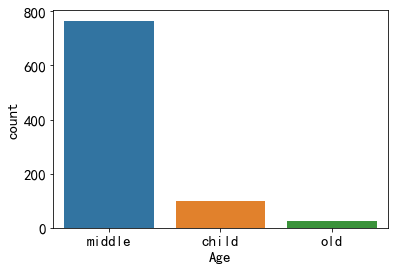

In [39]:
#对年龄进行分级，分开小孩和老人的数据
def agelevel(age):
    if age<=16:
        return 'child'
    elif age>=60:
        return 'old'
    else:
        return 'middle'
age22 = df['Age'].map(agelevel)

sns.countplot(x = age22, data = df)

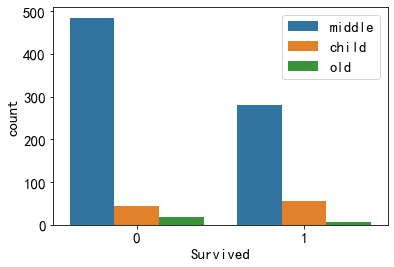

In [40]:
#分析乘客年龄与生还乘客之间的关系
sns.countplot(x = 'Survived',hue = age22, data = df)
plt.legend(loc = "best",fontsize = '15')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

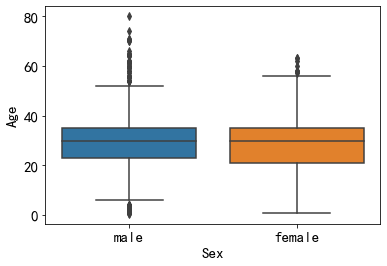

In [41]:
#基于性别，绘制乘客年龄分布箱线图
sns.boxplot(x = 'Sex',y = 'Age',data = df)